<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_2_%E2%80%94_Logistic_Regression_as_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 — Logistic Regression as a Neural Network

## Goal
Understand binary classification by modeling **logistic regression as a single neuron** and training it using gradient descent.

By the end of this week, you should:
- Understand why linear regression fails for classification
- Understand activation functions
- Implement a single neuron from scratch
- Train it using Binary Cross-Entropy loss
- Visualize decision boundaries

---

## 1. Why Linear Regression Fails for Classification

Linear regression outputs values in (−∞, +∞), but classification requires probabilities in [0, 1].

Problems with linear regression for classification:
- Outputs are not bounded
- No probabilistic interpretation
- Poor gradients near decision boundaries

We need a function that:
- Compresses values to [0, 1]
- Is differentiable
- Represents probability

---

## 2. Logistic Regression Overview

Logistic regression is **not just a statistical model** — it is a **single-neuron neural network**.

Structure:
- Inputs → weighted sum → activation → output

Mathematically:

z = w·x + b  
ŷ = σ(z)

Where:
- x ∈ ℝⁿ (input features)
- w ∈ ℝⁿ (weights)
- b ∈ ℝ (bias)
- σ(z) = sigmoid activation
- ŷ ∈ (0, 1) (predicted probability)

---

## 3. Sigmoid Activation Function

σ(z) = 1 / (1 + e⁻ᶻ)

Properties:
- Maps any real number to (0, 1)
- Smooth and differentiable
- Interpretable as probability

Derivative:
σ′(z) = σ(z)(1 − σ(z))

This derivative is crucial for learning.

---

## 4. Interpretation of Output

ŷ represents:
- P(y = 1 | x)

Decision rule:
- If ŷ ≥ 0.5 → class 1
- Else → class 0

The value 0.5 defines the **decision boundary**.

---

## 5. Loss Function for Classification

### Binary Cross-Entropy (Log Loss)

L = −[ y log(ŷ) + (1 − y) log(1 − ŷ) ]

Why not MSE?
- Poor gradients for probabilities
- Slower convergence
- Not aligned with probabilistic modeling

Binary Cross-Entropy:
- Penalizes confident wrong predictions heavily
- Produces strong gradients near decision boundary

---

## 6. Cost Function (Dataset Level)

For n samples:

J = (1/n) Σ Lᵢ

This is the quantity we minimize during training.

---

## 7. Gradients for Logistic Regression

Using chain rule:

∂J/∂w = (1/n) Xᵀ(ŷ − y)  
∂J/∂b = (1/n) Σ(ŷ − y)

Key insight:
- Same gradient form as linear regression
- Difference comes from activation + loss

---

## 8. Gradient Descent Update Rule

w = w − α ∂J/∂w  
b = b − α ∂J/∂b

Learning happens by repeatedly applying these updates.

---

## 9. Training Loop

A complete training iteration:

1. Compute z = w·x + b
2. Apply sigmoid to get ŷ
3. Compute Binary Cross-Entropy loss
4. Compute gradients
5. Update parameters

This is **forward pass + backward pass**.

---

## 10. Geometric Interpretation

In 2D:
w₁x₁ + w₂x₂ + b = 0

This equation defines a **line** (decision boundary).

- One side → class 1
- Other side → class 0

Logistic regression is a **linear classifier**.

---

## 11. Limitations

Logistic regression **cannot learn non-linearly separable data**.

Classic example:
- XOR problem

This limitation motivates **multi-layer neural networks**.

---

## Coding Questions (NumPy Only)

### Question 1: Sigmoid Function
Implement the sigmoid activation function.
- Test it on large positive and negative values
- Verify output range

---

### Question 2: Single Neuron Classifier
Implement logistic regression from scratch using NumPy.

Requirements:
- Vectorized implementation
- Binary Cross-Entropy loss
- Manual gradient descent
- Train on AND gate dataset

---

### Question 3: OR Gate
Reuse the same implementation.
- Change only labels
- Verify correct convergence

---

### Question 4: XOR Failure
Try training on XOR dataset.
- Observe predictions
- Explain failure in comments

---

### Question 5: Loss Curve
Track loss during training.
- Plot loss vs epochs
- Explain convergence behavior

---

### Question 6: Decision Boundary Visualization
For a 2D dataset:
- Plot data points
- Plot decision boundary
- Color regions by predicted class

---

### Question 7: Conceptual (Write Answers)
1. Why is sigmoid needed?
2. Why is Binary Cross-Entropy better than MSE here?
3. What does the decision boundary represent?
4. Why can’t logistic regression solve XOR?

---

## Outcome of Week 2

After completing this week, you should:
- Understand classification deeply
- See logistic regression as a neural network
- Be comfortable with BCE + gradients
- Clearly understand model limitations


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Question 1: Sigmoid Function

/tmp/ipython-input-2329174889.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


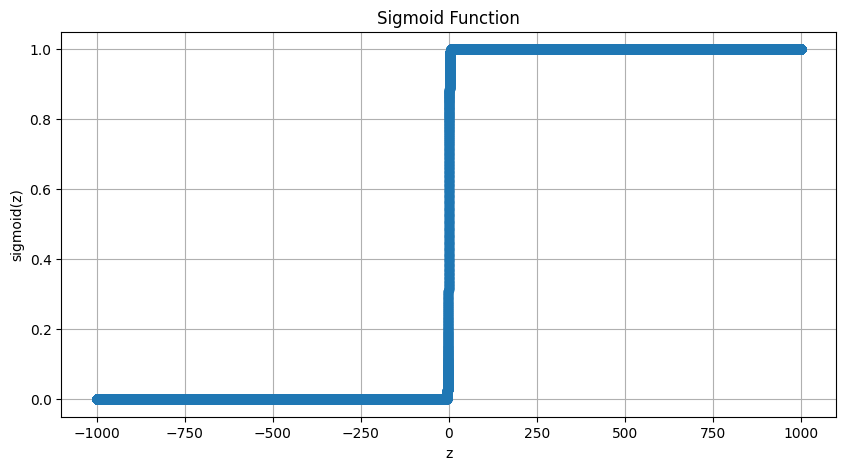

In [8]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z_test = np.arange(-1000, 1000, 0.01)
z_res = sigmoid(z_test)

#plot
plt.figure(figsize=(10, 5))
plt.plot(z_test, z_res, marker ='o')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

**Question 2: Single Neuron (Logistic Regression) — AND Gate**

Dataset (AND Gate)

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

Binary Cross-Entropy Loss

In [11]:
def binary_cross_entropy(y_true, y_pred):
  eps = 1e-8
  return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

Logistic Regression from Scratch

In [18]:
class LogisticRegression:
  def __init__(self, lr = 0.01, epochs = 1000) -> None:
    self.lr = lr
    self.epochs = epochs

  def fit(self, X, Y):
    m_samples, n_features = X.shape
    self.W = np.zeros((n_features, 1))
    self.b = 0
    self.losses = []

    for _ in range(self.epochs):
      # foward pass
      z = X @ self.W + self.b # @ is matrix multipier
      y_pred = sigmoid(z)

      # backward pass
      # Loss
      loss = binary_cross_entropy(Y, y_pred)
      self.losses.append(loss)

      # Gradiend
      dw = (1 / m_samples) * X.T @ (y_pred - Y)
      db = (1 / m_samples) * np.sum(y_pred - Y)

      #Update
      self.W -= self.lr * dw
      self.b -= self.lr * db

  def predict(self, X):
    z = X @ self.W + self.b
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)


Train AND Gate

In [22]:
model = LogisticRegression(lr = 0.01, epochs = 2000)
model.fit(X, Y)
model.predict(X)

array([[0],
       [0],
       [0],
       [1]])

Question 3: OR Gate (Reuse Same Model)

In [23]:
y_or = np.array([[0], [1], [1], [1]])

model_or = LogisticRegression(lr = 0.01, epochs = 2000)
model_or.fit(X, y_or)
model_or.predict(X)

array([[0],
       [1],
       [1],
       [1]])

Question 4: XOR Failure

In [24]:
y_xor = np.array([[0], [1], [1], [0]])

model_xor = LogisticRegression(lr = 0.01, epochs = 2000)
model_xor.fit(X, y_xor)
model_xor.predict(X)

array([[1],
       [1],
       [1],
       [1]])

XOR is NOT linearly separable.
A single neuron can only learn a straight-line decision boundary.
XOR requires at least one hidden layer.

Question 5: Loss Curve

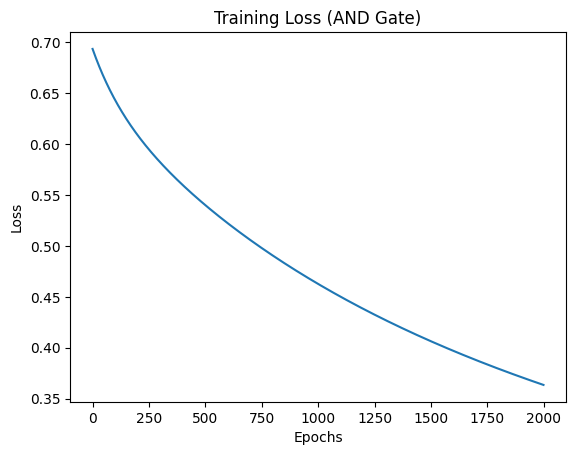

In [25]:
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss (AND Gate)")
plt.show()

Question 6: Decision Boundary Visualization (2D)

In [26]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary")
    plt.show()

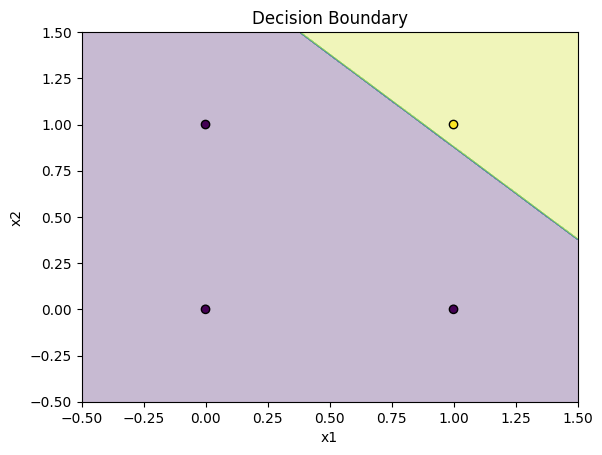

In [28]:
plot_decision_boundary(model, X, Y)